In [110]:
# NOTE: https://www.unb.ca/cic/datasets/nsl.html
# started w/ this http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("corrected", header=None)

In [111]:
data.shape

(311029, 42)

In [112]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [113]:
len(data.columns)

42

## Part 1: Preprocessing
Decided to use the dataset found : https://github.com/defcom17/NSL_KDD
<br/> Because the KDD set had redundancy and accuracy errors

In [114]:
field = pd.read_csv('NSL-KDD/Field Names.csv', header=None)
#field.columns = ["Field", "Type"]
#field.transpose()

In [115]:
# Establish test and train data
traindata = pd.read_csv('NSL-KDD/KDDTrain+.csv', header=None)
traindata[41].unique()
# testdata = pd.read_csv('NSL-KDD/KDDTest+.txt', header=None)

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'], dtype=object)

In [116]:
labels = pd.read_csv("NSL-KDD/Attack Types.csv", header=None)
for val in traindata[41].unique():
    found = False
    for l in labels.iloc[:,0]:
        if val == l:
            found = True
    if not found:
        print(val)

In [117]:
# verify labels and dataset
traindata.groupby(41).size()

41
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [118]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])
for c in col_names:
    found = False
    for f in field.iloc[:,0]:
        if (c == f):
            found = True
    if not found:
        print(c)

labels


In [119]:
df2 = pd.DataFrame([["labels","symbolic"]])
field = field.append(df2, ignore_index=True)

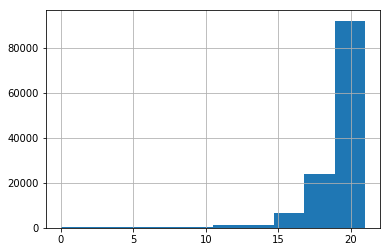

In [120]:
traindata[42].hist()
plt.show()

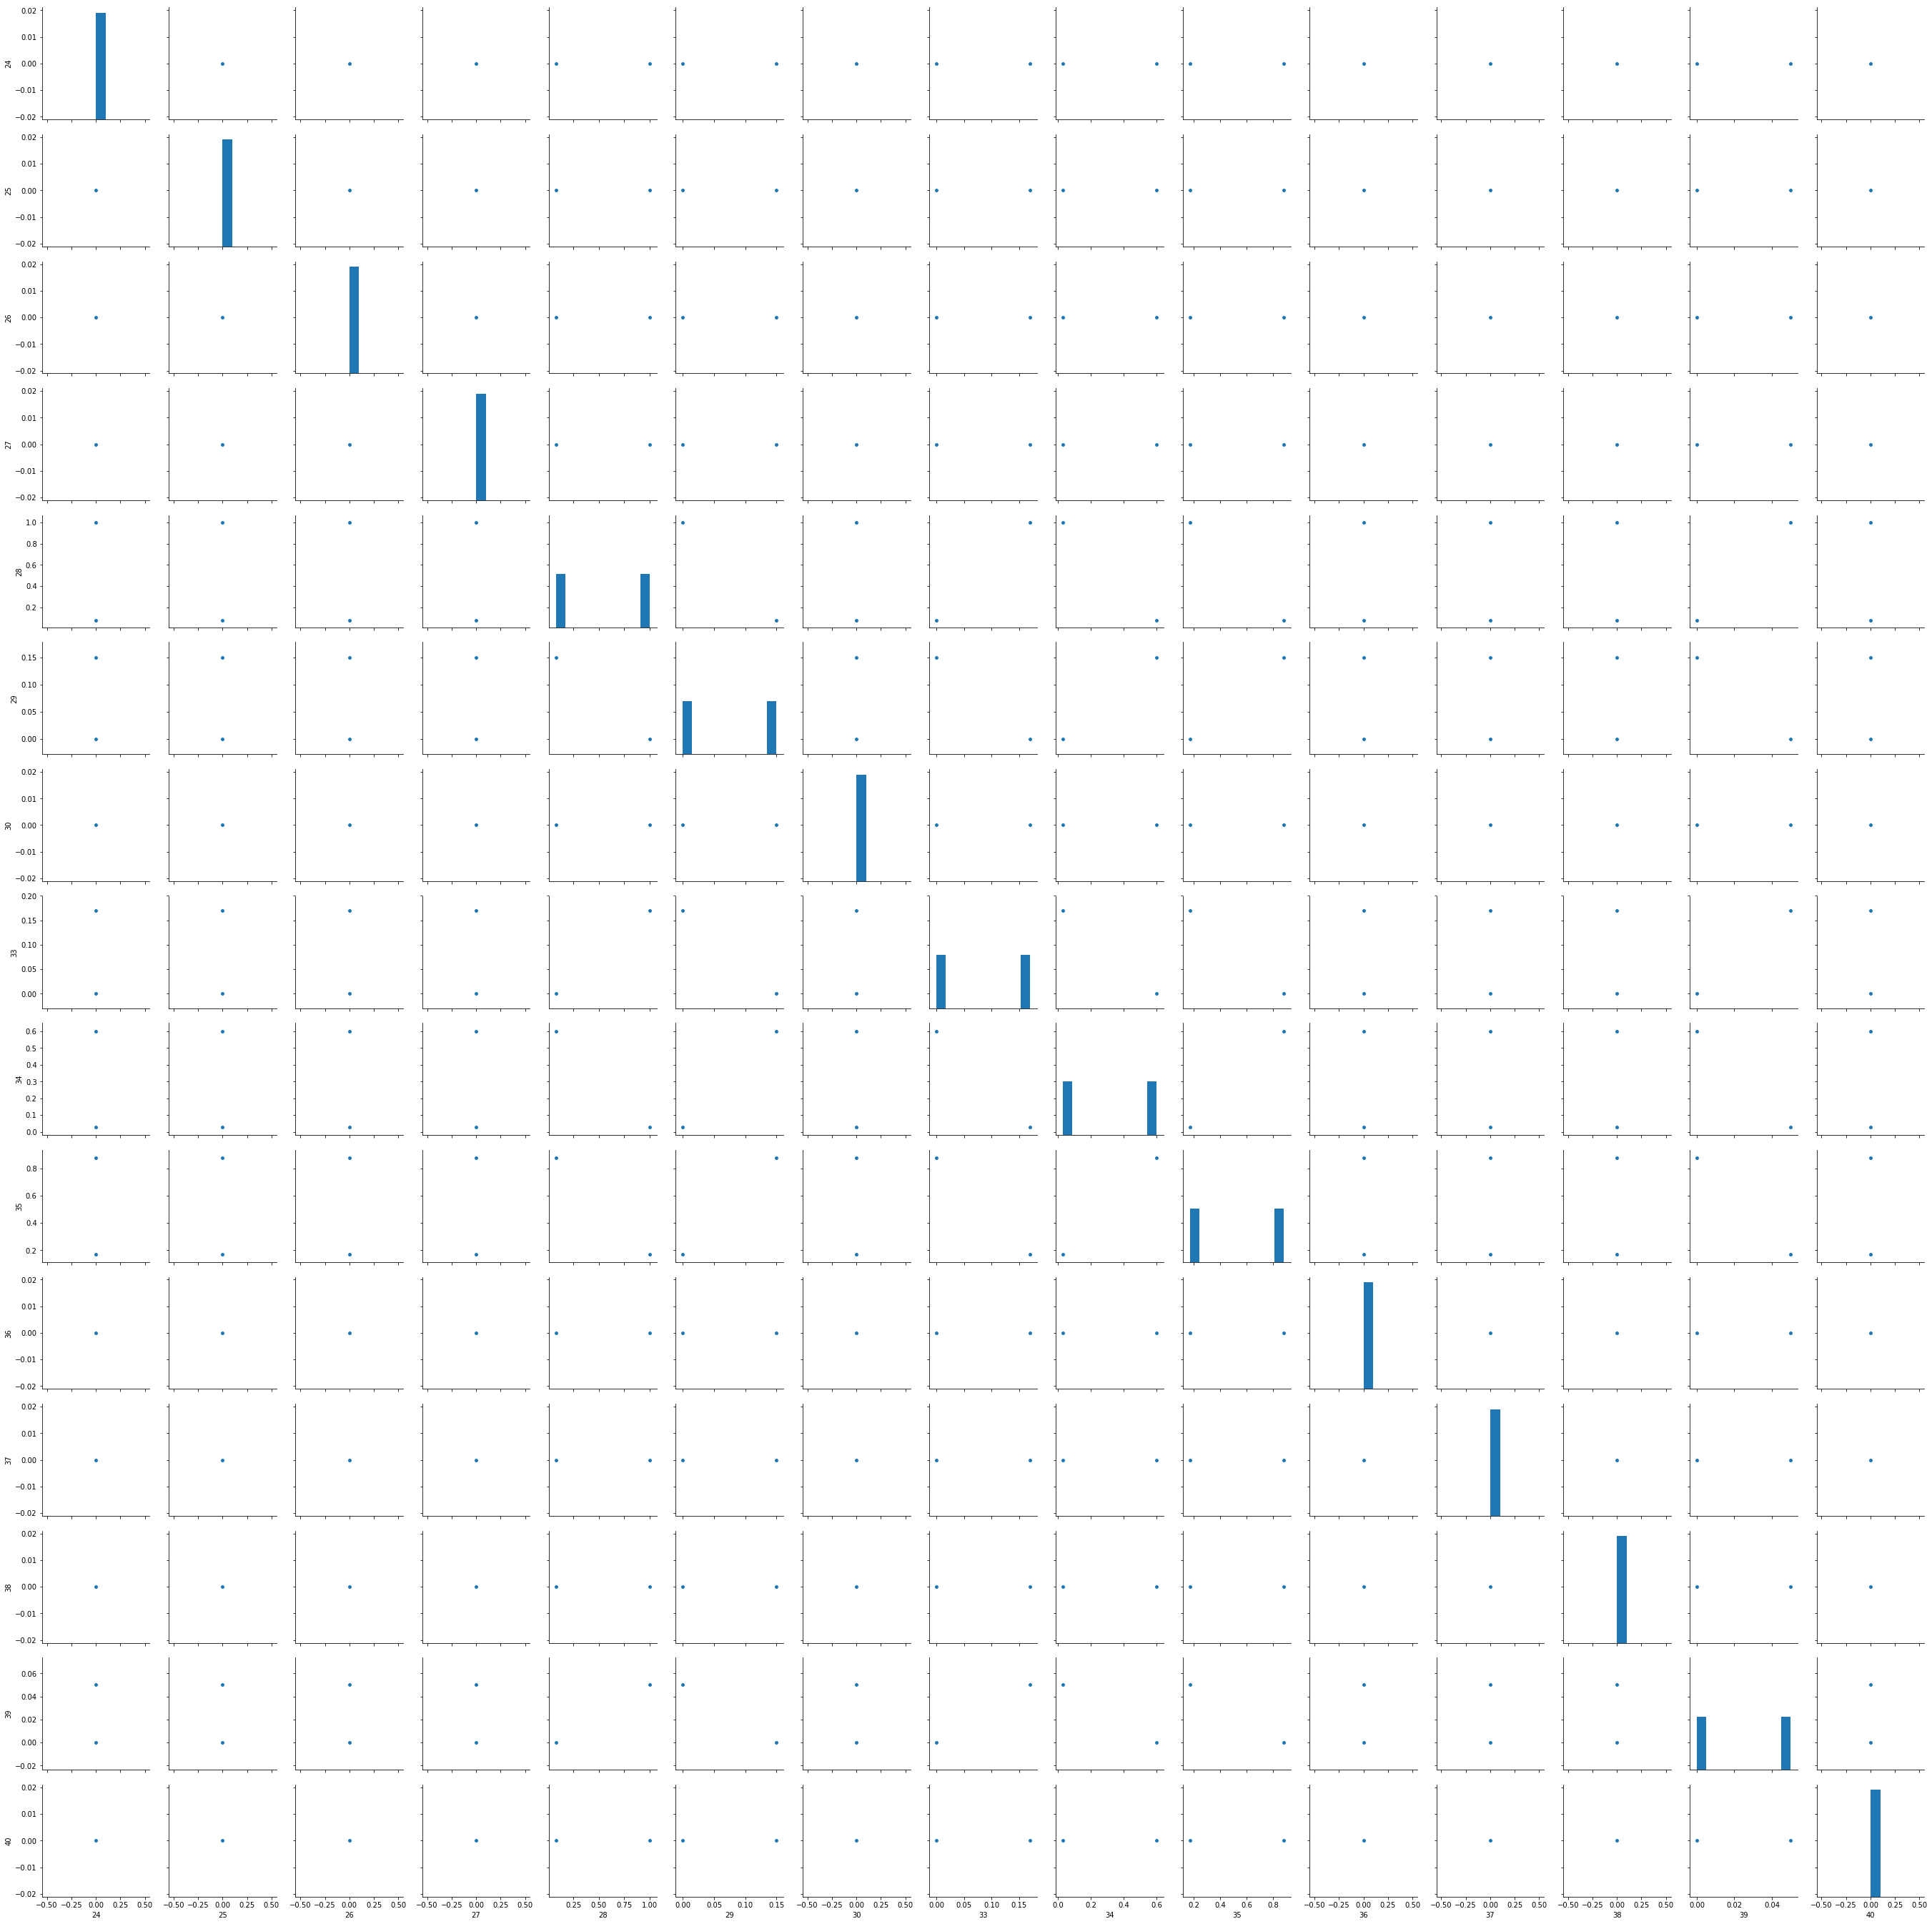

In [14]:
# PLEASE DON'T RUN THIS!!!!!!
sns.pairplot(traindata.loc[:1,traindata.dtypes == 'float64'])
plt.show()

In [121]:
field.loc[field[1] == 'symbolic']
#df['column_name'] >= A & df['column_name'] <= B
#df.loc[~df['column_name'].isin(some_values)]


,0,1
1,protocol_type,symbolic
2,service,symbolic
3,flag,symbolic
41,labels,symbolic


In [123]:
print(traindata.groupby(1).size())
protocol_map = dict(zip(traindata[1].unique(), range(len(traindata[1].unique()))))
print(protocol_map)

1
icmp      8291
tcp     102689
udp      14993
dtype: int64
{'tcp': 0, 'udp': 1, 'icmp': 2}


In [124]:
traindata = traindata.replace(protocol_map)
traindata.groupby(1).size()
# icmp=2, tcp=0, udp=1

1
0    102689
1     14993
2      8291
dtype: int64

In [125]:
print(traindata.groupby(3).size())
flag_map = dict(zip(traindata[3].unique(), range(len(traindata[3].unique()))))
print(flag_map)

3
OTH          46
REJ       11233
RSTO       1562
RSTOS0      103
RSTR       2421
S0        34851
S1          365
S2          127
S3           49
SF        74945
SH          271
dtype: int64
{'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'SH': 4, 'RSTO': 5, 'S1': 6, 'RSTOS0': 7, 'S3': 8, 'S2': 9, 'OTH': 10}


In [126]:
traindata = traindata.replace(flag_map)
print(traindata.groupby(3).size())

3
0     74945
1     34851
2     11233
3      2421
4       271
5      1562
6       365
7       103
8        49
9       127
10       46
dtype: int64


In [127]:
service_map = dict(zip(traindata[2].unique(), range(len(traindata[2].unique()))))
traindata = traindata.replace(service_map)

In [128]:
# have no IDEA what column 42 is!!! trial and error, let's see if it makes a difference - first test = without
traindata = traindata.drop(42, axis=1)

In [129]:
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

attack_simp = {}
for a in traindata[41].unique():
    if attack_dict[a] is not None:
        attack_simp[a] = attack_dict[a]

In [130]:
attack_simp

{'back': 'DoS',
 'buffer_overflow': 'U2R',
 'ftp_write': 'R2L',
 'guess_passwd': 'R2L',
 'imap': 'R2L',
 'ipsweep': 'Probe',
 'land': 'DoS',
 'loadmodule': 'U2R',
 'multihop': 'R2L',
 'neptune': 'DoS',
 'nmap': 'Probe',
 'normal': 'normal',
 'perl': 'U2R',
 'phf': 'R2L',
 'pod': 'DoS',
 'portsweep': 'Probe',
 'rootkit': 'U2R',
 'satan': 'Probe',
 'smurf': 'DoS',
 'spy': 'R2L',
 'teardrop': 'DoS',
 'warezclient': 'R2L',
 'warezmaster': 'R2L'}

## Naive Bayes

In [15]:
#traindata = pd.read_csv('NSL-KDD/KDDTrain+.csv', header=None)
testdata = pd.read_csv('NSL-KDD/KDDTest+.csv', header=None)

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
#C = testdata.iloc[:,0]
#T = testdata.iloc[:,1:42]

In [16]:
scaler = Normalizer().fit(X)

ValueError: could not convert string to float: 'normal'

In [ ]:
trainX = scaler.transform(X)

In [33]:
model.fit(traindata, labels)
print(model)

ValueError: could not convert string to float: 'normal'

In [ ]:
expected = testlabel
predicted = model.predict(testdata)